In [1]:
import torch
from torch_geometric.data import Data
import numpy as np
import networkx as nx
from torch_geometric.nn import MessagePassing
from torch_geometric.utils import add_self_loops, degree
import matplotlib.pyplot as plt
import scipy.special as SS
import scipy.stats as SSA
import math

In [2]:
rs = np.array([20.0, 10.0, 5.0, 2.0, 1.0, 0.5, 0.2, 0.1, 0.05, 0.025]) 

In [3]:
def mixed_distribution(lam, n, p):
    # Decide which distribution to sample from
    distribution_choice = np.random.choice(['poisson', 'negbin'], p=[0.8, 0.2])

    if distribution_choice == 'poisson':
        return SSA.poisson.rvs(lam)
    else: # 'negbin'
        return SSA.nbinom.rvs(n, p)

In [38]:
def mixed_distribution_torch(lam, n):
    # Derive p from n and lam for negative binomial
    p = n / (n + lam)
    p_prime = 1-p
    # Decide which distribution to sample from
    distribution_choice = torch.multinomial(torch.tensor([0.8, 0.2]), 1).item()

    if distribution_choice == 0:  # Poisson
        return torch.poisson(lam).item()
    else:  # Negative binomial
        return torch.distributions.negative_binomial.NegativeBinomial(total_count=n, probs=p_prime).sample().item()

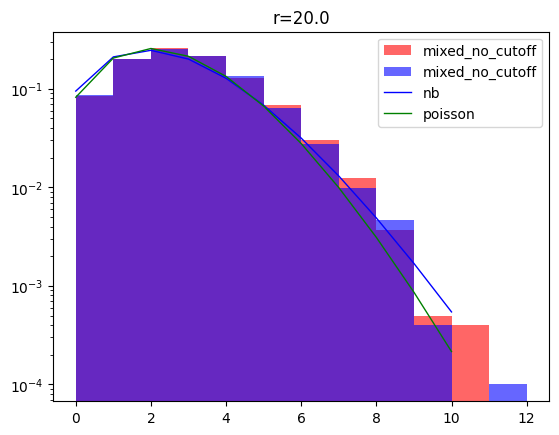

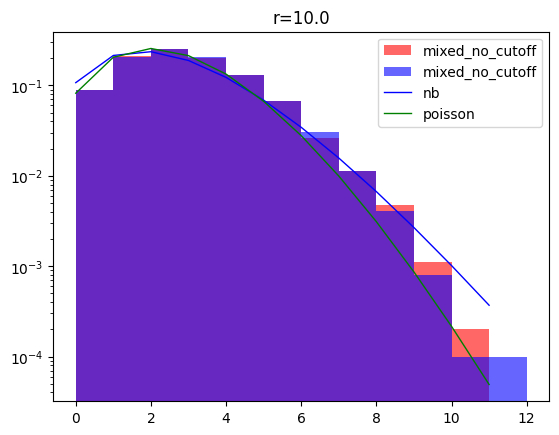

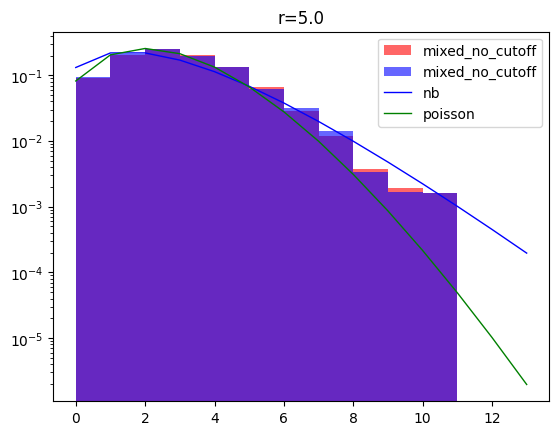

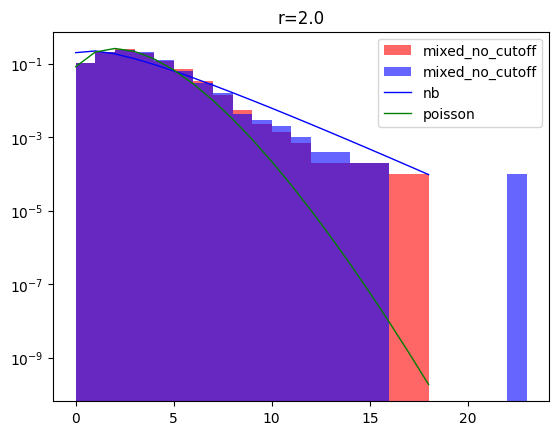

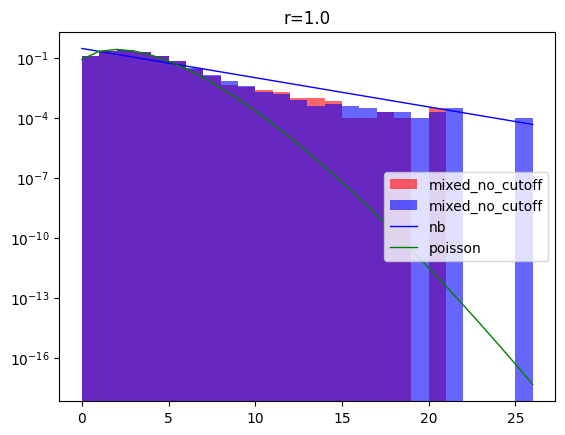

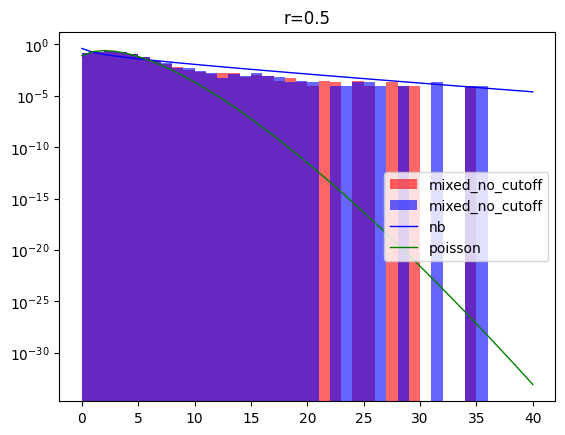

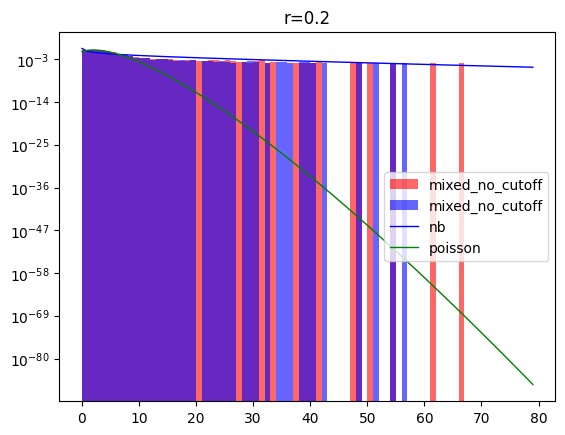

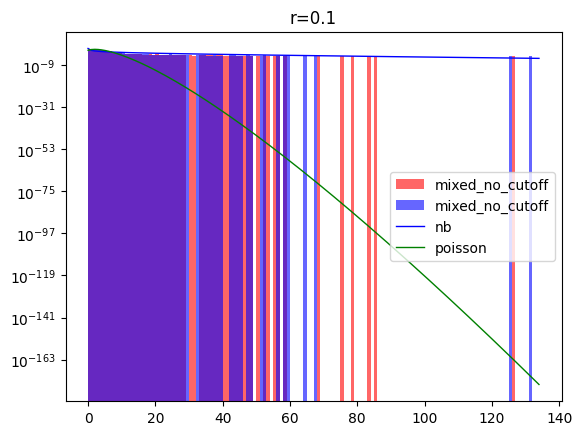

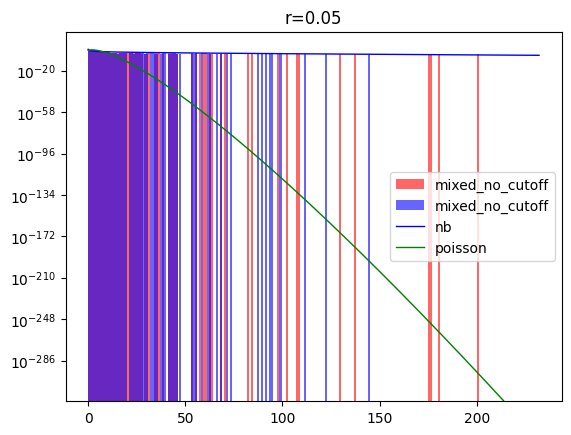

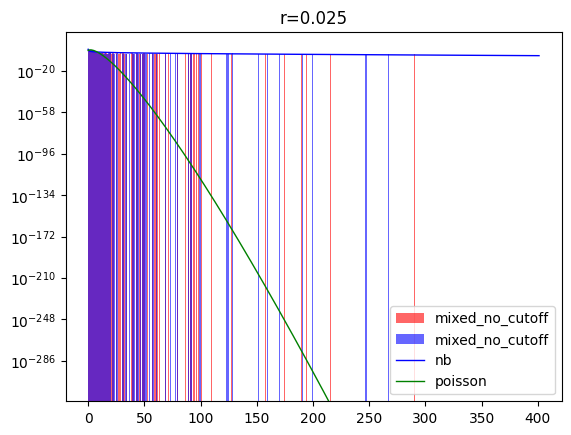

In [39]:
R0 = 2.5 
for r in rs:
    p = r/(R0+r)
    tt99 = np.zeros(10000)
    tt88 = [0]*10000
    for i in range(10000):
        tt99[i*1:(i+1)*1] = mixed_distribution(R0,r,p)
        tt88[i] = mixed_distribution_torch(torch.tensor(R0),torch.tensor(r))
    tt88 = np.array(tt88)
    plt.hist(tt99,density=True,bins=int(np.max(tt99)),color='red',label='mixed_no_cutoff',alpha=0.6)
    plt.hist(tt88,density=True,bins=int(np.max(tt88)),color='blue',label='mixed_no_cutoff',alpha=0.6)
# plt.hist(tt3,density=True,label='ssa',alpha=0.5,bins=int(np.max(tt3)))
    x = np.arange(SSA.nbinom.ppf(0.0001, r, p),
              SSA.nbinom.ppf(0.9999, r, p))  # define the range of x values
    pmf_bn = SSA.nbinom.pmf(x, r, p)  # calculate the probability mass function
    pmf_ps = SSA.poisson.pmf(x, mu=R0)  # calculate the probability mass function
    plt.plot(x,pmf_bn,label='nb',color='blue',lw=1)
    plt.plot(x,pmf_ps,label='poisson',color='green',lw=1)
# plt.plot(np.arange(0,100,1),weights_n,label='create',alpha=0.8,lw=0.9,color='orange')
    plt.legend()
# plt.xlim(-10,150)
# plt.ylim(-0.,0.02)
    plt.title('r={}'.format(r))
    plt.yscale('log')
    plt.show()
    plt.close()